### <b>Raspagem Web</b> <i>(Web Scraping)</i><br>
*ou* Raspagem de Dados<br><br>



Inspecionar

In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

req= requests.get("https://www.atlasbig.com/en-us/countries-onion-production")
if req.status_code == 200:
  print("Requisição bem sucedida!")
  content= req.content

Requisição bem sucedida!


In [11]:
soup= BeautifulSoup(content, "html.parser")
table= soup.find(name= "table")

In [12]:
table_str= str(table)
df= pd.read_html(table_str)[0]

In [13]:
table= soup.find(name= "table", attrs= {"id": "data_table-2-0-1"})

In [14]:
drop_indexes= df[df["Country"]== "Country"].index # Pega indexes onde a coluna 'Country' possui valor 'Country'
df.drop(drop_indexes, inplace= True) # Elimina os valores dos index passados da tabela

df

,Unnamed: 0,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,NaN,China,24966366,17.912,1128970,22114.3
1,NaN,India,22819000,17.074,1220000,18704.1
2,NaN,United States of America,3170270,9.672,52370,60536.0
3,NaN,Egypt,3081047,31.602,87948,35032.6
4,NaN,Turkey,2200000,27.224,68713,32017.2
...,...,...,...,...,...,...
136,NaN,Bahrain,150,0.100,5,30000.0
137,NaN,Montserrat,103,21.020,40,2611.2
138,NaN,Saint Kitts and Nevis,80,1.731,7,11428.6
139,NaN,Bermuda,60,0.941,5,11823.1


In [15]:
df.dtypes

Unnamed: 0                    float64
Country                        object
Production (Tons)               int64
Production per Person (Kg)    float64
Acreage (Hectare)               int64
Yield (Kg / Hectare)          float64
dtype: object

In [16]:
df= df.astype({"Country": "category"})
df.dtypes

Unnamed: 0                     float64
Country                       category
Production (Tons)                int64
Production per Person (Kg)     float64
Acreage (Hectare)                int64
Yield (Kg / Hectare)           float64
dtype: object

In [17]:
df["Production (Tons)"]= pd.to_numeric(df["Production (Tons)"], errors= "coerce")
df["Production per Person (Kg)"]= pd.to_numeric(df["Production per Person (Kg)"], errors= "coerce")
df["Acreage (Hectare)"]= pd.to_numeric(df["Acreage (Hectare)"], errors= "coerce")
df["Yield (Kg / Hectare)"]= pd.to_numeric(df["Yield (Kg / Hectare)"], errors= "coerce")

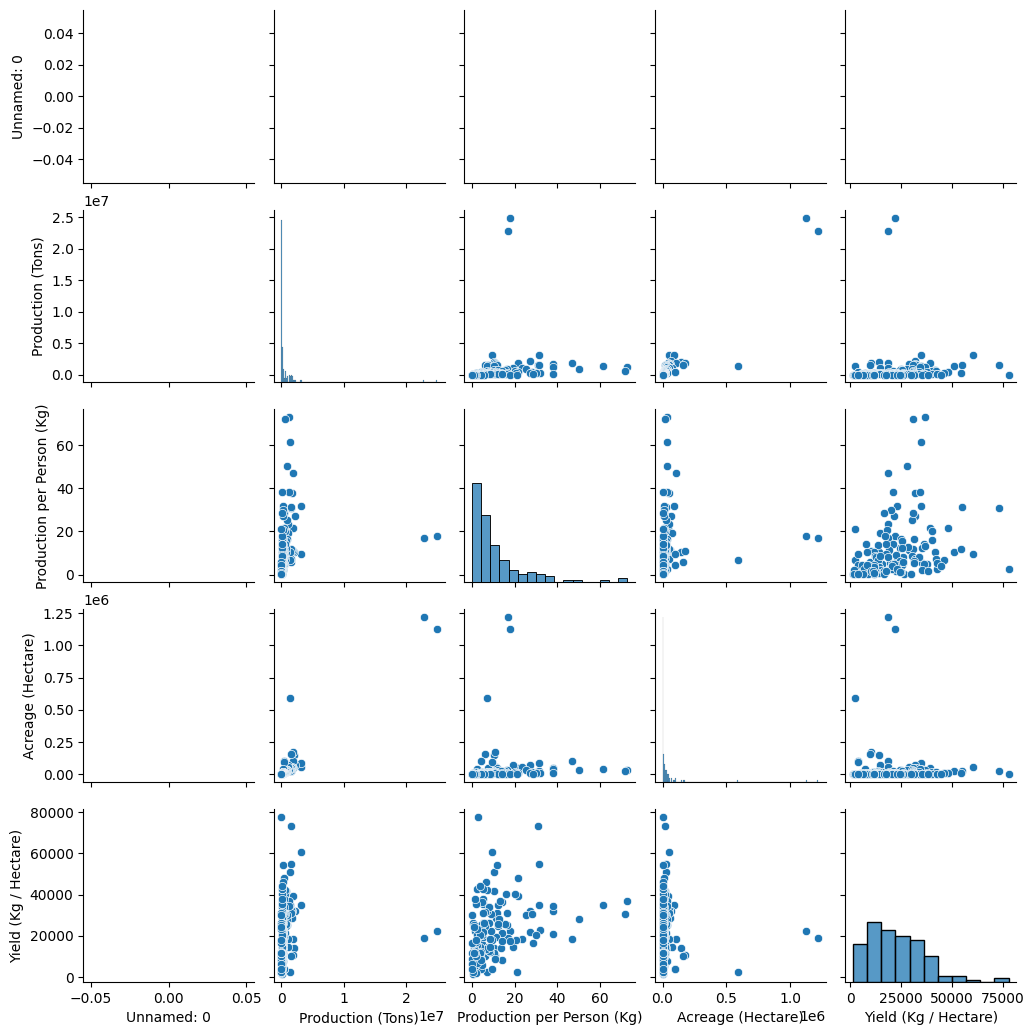

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, height= 2.1);

[Artigo Original](https://medium.com/data-girls-neuron/como-fazer-uma-raspagem-de-dados-web-scraping-que-fa%C3%A7a-sentido-para-mim-11aecc0f776)